In [40]:
import pandas as pd
import numpy as np
from collections import defaultdict
# 此csv文件来自第二问的代码，请下载第二问的代码和数据https://mianbaoduo.com/o/bread/YpmYm5xy
data = pd.read_csv('问题二所有数据汇总.csv')

In [41]:
data=pd.concat([data[data["年份"]==2020],data[data["年份"]==2021]],axis=0)
data=data.reset_index(drop=True) 

In [42]:
inde=[]
for i in range(len(data)):
    if "旅游攻略" in  data.iloc[i,:]["语料ID"]:
        inde.append(i)

In [43]:
data.drop(inde, axis = 0)

,语料ID,文本,产品名称,年份,产品ID
0,餐饮评论-2178,在麻辣烫，炸货炒粉，沙煲粉中徘徊，最终还是败给了炸鸡，好想吃鸡了! 热热的好吃，\n滋味烤...,优乐堡（开发区店）,2020,ID1178
1,餐饮评论-2179,服务态度好，蛋糕口味很好，奶油好吃，不腻。舍友们都很赞。\n蛋糕8选1,优之品西点,2020,ID1179
2,餐饮评论-2180,孩子上课附近，买东西方便，味道也不错，价格一般。\n奶茶5选2，提供免费WiFi,元晟坊蛋糕（南香公园店）,2020,ID1180
3,餐饮评论-2181,服务一般般吧，有点小要求都不能满足吧，不过鸡肉卷味道还不错\n超值汉堡/鸡肉卷2选1,优乐堡（开发区店）,2020,ID1181
4,餐饮评论-2182,第一次很多人，第二次就没有人了，连唱歌都没有了\n精致享受单人餐，提供免费WiFi,优悦西餐厅（维斯顿店）,2020,ID1182
...,...,...,...,...,...
7247,景区评论-2199,茂名森林公园不仅是旅游、观光、休闲、娱乐的好去处，更是展示生物多样性和奇妙性，传播百科知识，...,茂名森林公园,2021,ID9276
7248,景区评论-2200,湖光岩风景区位于中国大陆最南端湛江市区西南18公里处，被联合国地质专家称为研究地球与地质科学...,湖光岩,2021,ID9277
7249,景区评论-2201,吴川市鼎龙湾附近一个免费的摄影基地，好看的场景 真的非常非常多，我因为没带几套衣服，时间也有...,鼎龙湾欢乐海岸,2021,ID9278
7250,景区评论-2202,#广东旅游 #广东旅游攻略 #发现旅途的色彩 #冲啊浪人们 广东茂名旅游景点,御水古温泉旅游度假区,2021,ID9279


In [44]:
data=data.drop(inde, axis = 0)

In [45]:

# 给每个样本中的产品onehot编码
# 总共有438个产品，则初始化有438列的0，如果一个样本中存在“丰年面包店“和”功夫鸡排”两个产品，则438列中，这两列对应是1。
# 返回one-hot数组和产品字典编号字典
def create_one_hot(data):
    """将实体数据转换成：0，1数据类型，类似于词袋模型
    """
    data['所有文本'] = data['文本']+' '+data['产品名称']
    all_feature_li = data['产品名称']
    all_feature_set_li = list(set(all_feature_li))

    feature_dict = defaultdict(int)
    for n, feat in enumerate(all_feature_set_li):
        feature_dict[feat] = n
    # print(feature_dict)

    out_li = list()
    for j in range(len(data)):
        text = data.iloc[j]['所有文本']
        feature_num_li = []
        for i, f in enumerate(feature_dict):
            if f in text:
                feature_num_li.append(feature_dict[f])
        inner_li = [1 if num in feature_num_li else 0 for num in range(
            len(all_feature_set_li))]

        out_li.append(inner_li)
    out_array = np.array(out_li)
    return out_array, feature_dict

In [46]:
data_array, feature_di = create_one_hot(data)
n_samples, n_features = data_array.shape
together_appear_dict = defaultdict(int)
feature_num_dict = defaultdict(int)

    # 通过两层的for循环计算特征单独出现的次数，以及两两特征共同出现的次数
for line in data_array:
    for i in range(n_features):
        if line[i] == 0:
            continue
        feature_num_dict[i] += 1

        for j in range(n_features):
            if i == j:
                continue
            if line[j] == 1:
                together_appear_dict[(i, j)] += 1

In [47]:
y=pd.DataFrame(together_appear_dict.items())
y["列1"]=y[1]
y["列2"]=y[1]
y["列3"]=y[1]
y["列4"]=y[1]
for i in range(len(y)):
    y["列1"][i]=y[0][i][0]
    y["列2"][i]=y[0][i][1]

<ipython-input-47-6ec6b0d393e7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["列1"][i]=y[0][i][0]
<ipython-input-47-6ec6b0d393e7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["列2"][i]=y[0][i][1]


In [48]:
num1={}
for i,j in enumerate(feature_di):
    num1[i]=j
num1
num3=[]
for i in y["列1"]:
    num3.append(num1[i])
num4=[]
for i in y["列2"]:
    num4.append(num1[i])
y["列3"]=num3
y["列4"]=num4
y["列5"]=y[1]
y=y.iloc[:,4:]
y.columns=["产品名称1","产品名称2","关联度"]
submit_3=y

In [49]:
submit_3["关联度"].describe()

count    66.000000
mean      1.696970
std       1.456758
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       8.000000
Name: 关联度, dtype: float64

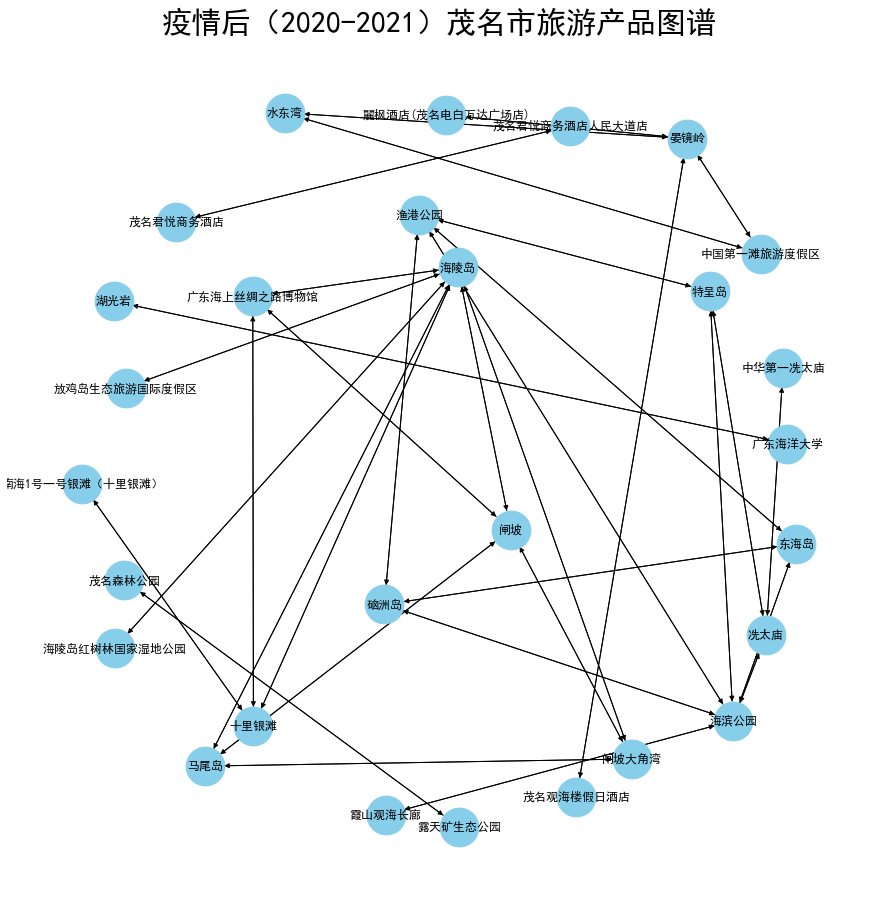

In [52]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

from spacy import displacy
G = nx.from_pandas_edgelist(submit_3, "产品名称1", "产品名称2",
                            edge_attr=True, create_using=nx.MultiDiGraph())


plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=2)  # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue',
        node_size=1500, edge_cmap=plt.cm.Blues, pos=pos)
plt.title("疫情后（2020-2021）茂名市旅游产品图谱",fontsize=30)
plt.savefig('产品关联知识图谱.png',dpi=300)

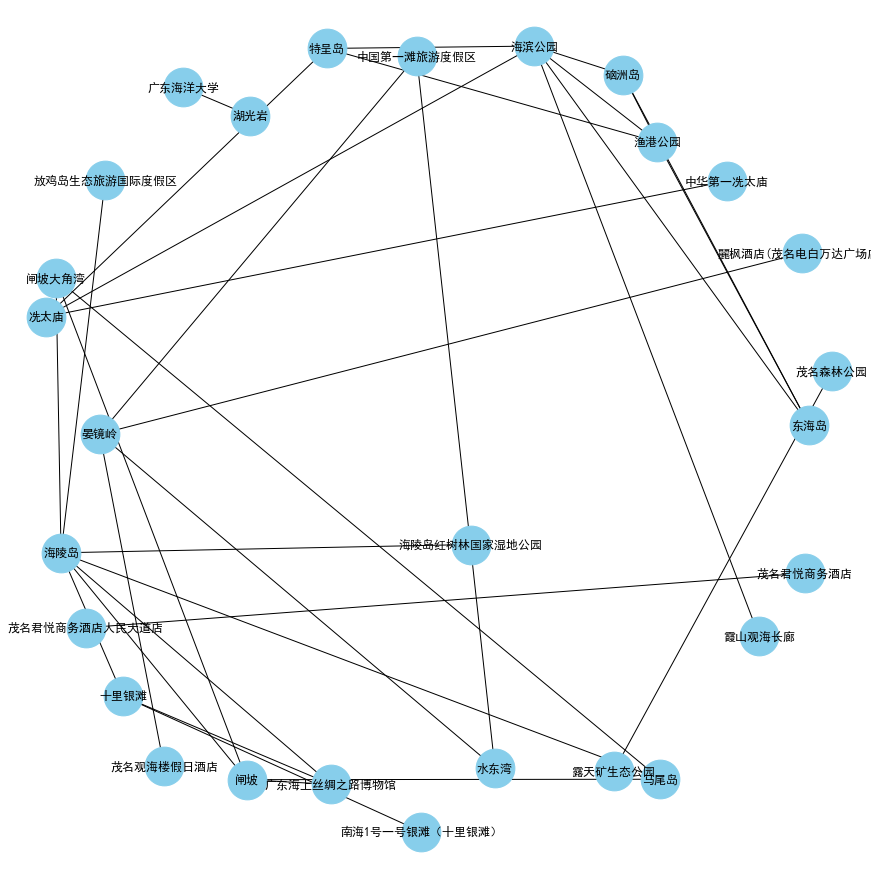

In [53]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

from spacy import displacy
G = nx.from_pandas_edgelist(submit_3, "产品名称1", "产品名称2")


plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=2)  # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue',
        node_size=1500, edge_cmap=plt.cm.Blues, pos=pos)
plt.savefig('产品关联知识图谱.png',dpi=300)

In [57]:
d = dict(nx.degree(G))
print(d)
print("平均度为：", sum(d.values())/len(G.nodes))

{'茂名君悦商务酒店人民大道店': 1, '茂名君悦商务酒店': 1, '冼太庙': 3, '中华第一冼太庙': 1, '闸坡': 4, '闸坡大角湾': 3, '马尾岛': 3, '海陵岛': 7, '海陵岛红树林国家湿地公园': 1, '东海岛': 3, '硇洲岛': 3, '十里银滩': 3, '南海1号一号银滩（十里银滩）': 1, '霞山观海长廊': 1, '海滨公园': 6, '广东海洋大学': 1, '湖光岩': 1, '茂名森林公园': 1, '露天矿生态公园': 1, '放鸡岛生态旅游国际度假区': 1, '茂名观海楼假日酒店': 1, '晏镜岭': 4, '麗枫酒店(茂名电白万达广场店)': 1, '水东湾': 2, '中国第一滩旅游度假区': 2, '特呈岛': 3, '广东海上丝绸之路博物馆': 3, '渔港公园': 4}
平均度为： 2.357142857142857


[0, 1, 2, 3, 4, 5, 6, 7]
[0.0, 0.4642857142857143, 0.07142857142857142, 0.2857142857142857, 0.10714285714285714, 0.0, 0.03571428571428571, 0.03571428571428571]


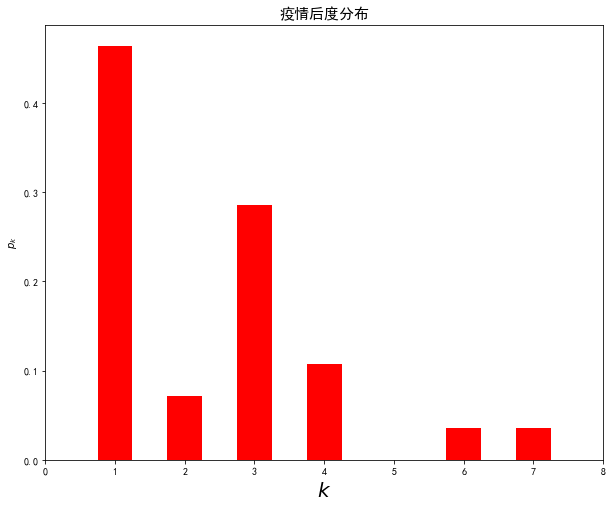

In [79]:
#绘制度分布直方图
import matplotlib.pyplot as plt

x = list(range(max(d.values())+1))
y = [i/len(G.nodes) for i in nx.degree_histogram(G)]
print(x)
print(y)


plt.bar(x, y, width=0.5, color="red")
plt.xlabel("$k$",fontsize=20)
plt.ylabel("$p_k$")
plt.title("度分布",fontsize=15)
plt.xlim([0,8])
plt.title("疫情后度分布",fontsize=15)
plt.savefig("疫情后度分布.png")


In [59]:
print(nx.is_connected(G))

False


In [60]:
# 平均集聚系数
print(nx.average_clustering(G))

0.35969387755102034


In [61]:
# 全局集聚系数
print(nx.transitivity(G))

0.4875


In [62]:
# 局部效率
print(nx.local_efficiency(G))

0.39234693877551025


In [63]:
# 全局效率
print(nx.global_efficiency(G))

0.14153439153439154


In [64]:
# 定义求最近邻平均度的函数
def average_nearest_neighbor_degree(G):
    k = set([G.degree(i) for i in G.nodes()])  # 获取所有可能的度值
    sorted_k = sorted(k)
   
    k_nn_k = []
    for ki in sorted_k:
        c = 0
        k_nn_i = 0
        for i in G.nodes():
            if G.degree(i) == ki: 
                k_nn_i += sum([G.degree(j) for j in list(nx.all_neighbors(G,i))])/ki
                c += 1
        k_nn_k.append(k_nn_i/c)    
   
    return sorted_k, k_nn_k

In [65]:
r1 = nx.degree_pearson_correlation_coefficient(G)

In [66]:
x1, y1 = average_nearest_neighbor_degree(G)

Text(0.5, 1.0, '度-度相关性')

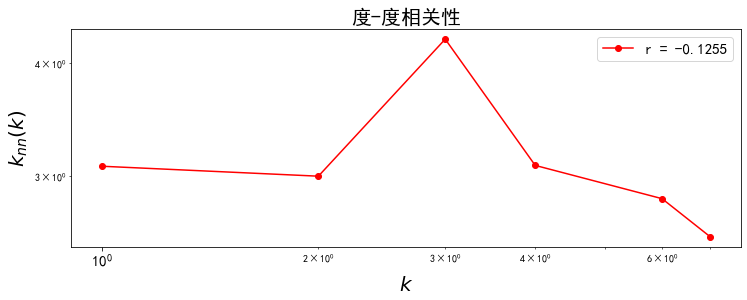

In [67]:
plt.figure(figsize=(12,4))
plt.plot(x1, y1, 'r-o', label='r = '+'%.4f'%r1)
plt.legend(loc=0,fontsize=15)
plt.xlabel("$k$",fontsize=20)
plt.ylabel("$k_{nn}(k)$",fontsize=20)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('度-度相关性',fontsize=20)


In [68]:
bc = nx.betweenness_centrality(G)

In [69]:
# 获取介数最大的节点标签
max_id = max(bc, key=bc.get)
print(max_id)
# 绘制网络

海陵岛


In [70]:
ks = nx.core_number(G)

In [71]:
# 获取核度最大的节点标签
max_id = max(ks, key=ks.get)
print(max_id)

闸坡


In [72]:
#网络密度

print(nx.density(G))

0.0873015873015873


In [ ]:
dc1 = nx.degree_centrality(G)
bc1 = nx.betweenness_centrality(G)
cc1 = nx.closeness_centrality(G)
ec1 = nx.eigenvector_centrality(G)
# 绘图比较
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(dc1.keys(), dc1.values(), 'r-o')
plt.xlabel("node label")
plt.ylabel("dc")
plt.title("degree_centrality")

plt.subplot(222)
plt.plot(bc1.keys(), bc1.values(), 'r-o')
plt.xlabel("node label")
plt.ylabel("bc")
plt.title("betweenness_centrality")

plt.subplot(223)
plt.plot(cc1.keys(), cc1.values(), 'r-o')
plt.xlabel("node label")
plt.ylabel("cc")
plt.title("closeness_centrality")


In [74]:
dc1 = nx.degree_centrality(G)


In [75]:
bc1 = nx.betweenness_centrality(G)


In [76]:
cc1 = nx.closeness_centrality(G)


In [ ]:
ec1 = nx.eigenvector_centrality(G)